In [ ]:
%pip install keras
%pip install tensorflow

In [24]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.1 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 f


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [26]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [29]:
# Extract features (images) and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers
labels = labels.astype(np.uint8)

# Filter the dataset to include only 0s and 1s
filter_mask = (labels == 0) | (labels == 1)

images_filtered = images[filter_mask]
labels_filtered = labels[filter_mask]

In [34]:
labels_per = np.where(labels_filtered == 1, 1, -1)

In [33]:
def predict(X):
    return np.where(np.dot(np.transpose(weight),X) >= 0.0, 1, -1)


def perceptron(feature, label):
    weight = np.zeros(feature.shape[1])
    print(weight)
    errors = []
    while True:
        err = 0
        for x, y in zip(feature,label):
            ###The lecture from Cornell and the book we talk about approach and updat the weight different this code is follow what the prof said in the lecture video at cornell
            if y*(np.dot(np.transpose(weight),x)) <= 0:
                weight = weight + y * x
                #print(weight)
                err += 1
            #print(weight)
        print(err)
        errors.append(err)      
        if errors[-1] == 0:
            break
    print('Number of errors each iteration:' , errors)
    return weight

In [36]:
weight = perceptron(images_filtered, labels_per)
weight

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
5
0
Number of errors each iteration: [6, 5, 0]


array([  0.,   0.,  -1., -12.,   3.,  35.,   4.,   0.,   0.,   3., -16.,
        -7.,  20., -10.,   0.,   0.,   2.,  16., -12.,  47.,  74., -16.,
       -14.,   0.,   1.,  12.,   1.,  45.,  57., -15., -26.,   0.,   0.,
       -19., -42.,  45.,  53., -14., -22.,   0.,   0., -10., -45.,  38.,
        21., -17., -13.,   0.,   0.,  -2., -41.,   5.,   6.,  -4.,   4.,
         0.,   0.,   0.,  -6., -11.,   7.,  42.,   7.,   0.])

In [42]:
predict(images_filtered[4])

array(-1)

In [41]:
labels_filtered[4]

0

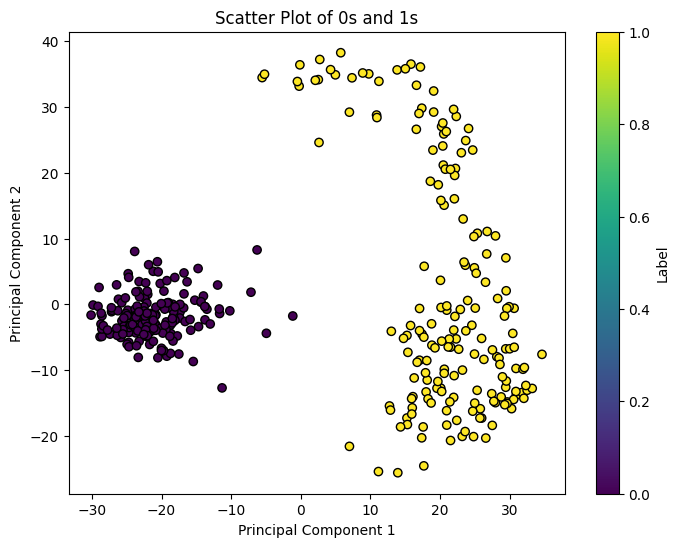

In [43]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_filtered)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels_filtered, cmap='viridis', marker='o', edgecolors='k')
plt.title('Scatter Plot of 0s and 1s')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

# Testing with other set of number

In [44]:
# Extract features (images) and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers
labels = labels.astype(np.uint8)

# Filter the dataset to include only 0s and 1s
filter_mask = (labels == 5) | (labels == 6)

images_filtered = images[filter_mask]
labels_filtered = labels[filter_mask]

In [45]:
#labels for the perceptron we assume 1 is 6 and -1 is 5
labels_per = np.where(labels_filtered == 6, 1, -1)

In [47]:
weight = perceptron(images_filtered, labels_per)
weight

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15
2
2
0
Number of errors each iteration: [15, 2, 2, 0]


array([  0.,  -6., -62., -11., -24., -58., -41.,   0.,   0., -36., -61.,
        -4., -41., -47., -18.,   0.,   0., -23.,  -3.,  36.,  -9.,  -7.,
        -1.,   0.,   0., -13., -12., -18., -24.,   3.,   3.,   0.,   0.,
        17.,  53.,  -2., -19., -10.,   1.,   0.,   0.,  12.,  94.,  58.,
       -14.,  16.,  30.,   0.,   0.,   1.,  50.,  28., -27.,  20.,  58.,
         2.,   0.,  -5., -58., -38.,  16.,  43.,  25.,   0.])

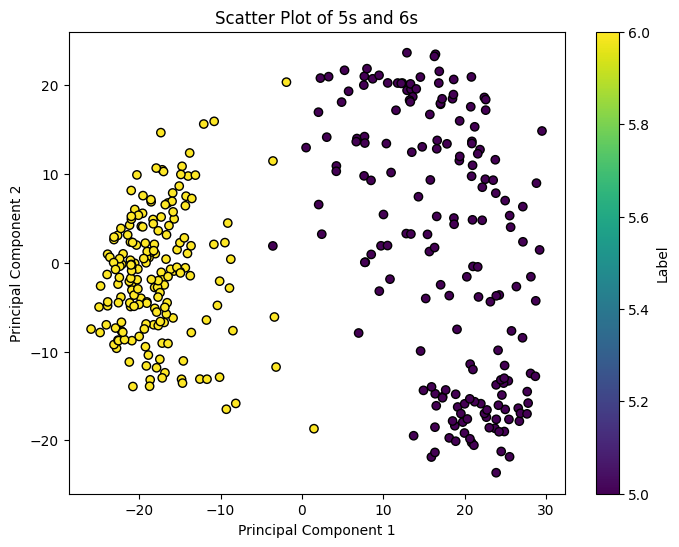

In [48]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_filtered)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels_filtered, cmap='viridis', marker='o', edgecolors='k')
plt.title('Scatter Plot of 5s and 6s')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()